In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
out_dir = "./data/out"
optim_dir = os.path.join(out_dir,"simulated-annealing")
res_dir = os.path.join(optim_dir, "09")

In [3]:
progress = pd.read_csv(os.path.join(res_dir, "iteration-progress.csv"))
progress.head()

,curr state net profit,temperature
0,4965.754883,57.000000
1,1398.247681,56.715000
2,6750.531738,56.431426
3,3966.188232,56.149269
4,14673.394531,55.868523


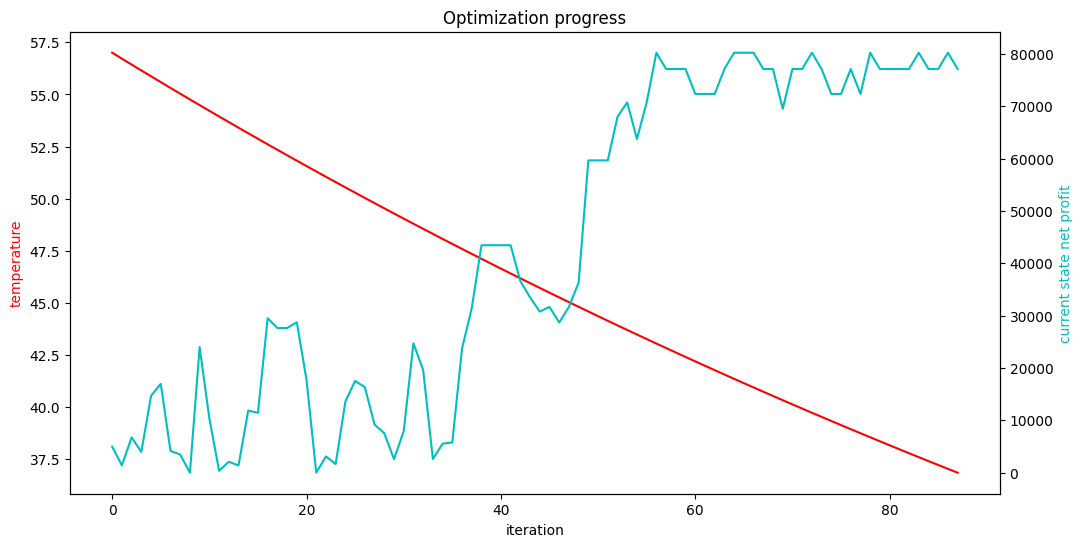

In [4]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax2 = ax1.twinx()
ax1.plot(progress["temperature"], 'r-')
ax2.plot(progress["curr state net profit"], 'c-')


ax1.set_title("Optimization progress")
ax1.set_xlabel("iteration")
ax1.set_ylabel('temperature', color='r')
ax2.set_ylabel("current state net profit", color='c');

In [5]:
progress_path = os.path.join(res_dir, "progress.png")
fig.savefig(progress_path, bbox_inches='tight', dpi=200)

In [6]:
threshold = pd.read_csv(os.path.join(res_dir, "threshold.csv"))
threshold.head()

,threshold
0,0.715209
1,0.874194
2,0.521096
3,0.540531
4,0.744048


In [7]:
# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib
def scatter_with_gaussian_kde(ax, x, y):
    # https://stackoverflow.com/a/20107592/3015186
    # Answer by Joel Kington

    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    ax.scatter(x, y, c=z, s=100)

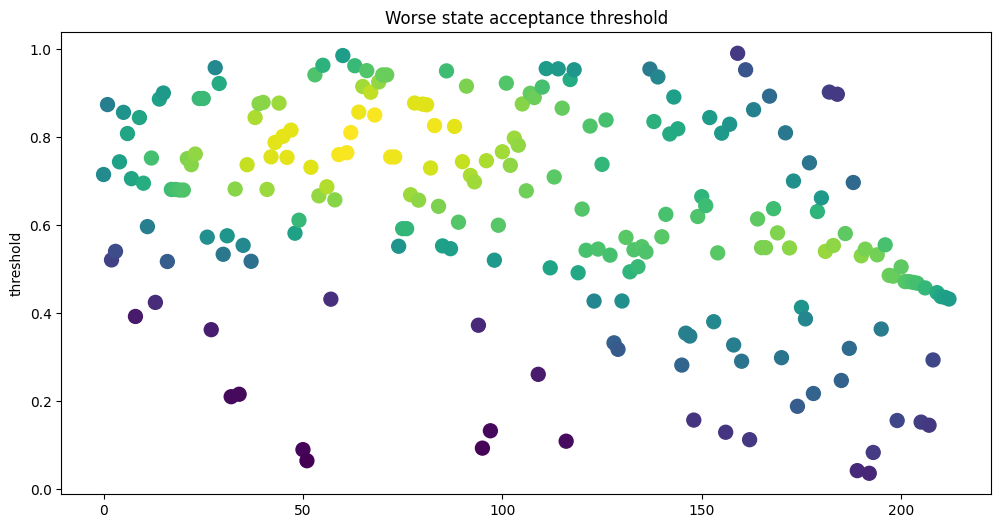

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
scatter_with_gaussian_kde(ax, threshold.index, threshold[threshold.columns[0]])
ax.set_title("Worse state acceptance threshold")
ax.set_ylabel("threshold");